# Statistical Distribution Modelling: DALL-E-2

In [1]:
import sys
sys.path.append('../')

from db import *
from analysis import *

In [2]:
data = (
    session.query(
        # ImageCreationRequest
        ImageCreationRequest.response_time,
    ).filter(
        ImageCreationRequest.model == 'dalle-2',
        ImageCreationRequest.success == True,
        ImageCreationRequest.timing_valid == True,
    )
)
df = query_to_df(data)
print(len(df))
df.head()

79


,response_time
0,9.496966
1,9.538098
2,9.936604
3,10.238569
4,10.100267


# Plot

ks_stat=array([0.06292819]), p_value=array([0.89355822])


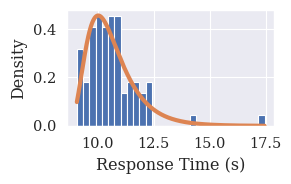

In [3]:
import scipy.stats as stats
import numpy as np

# sns.set_theme(context="paper", font='Times New Roman', font_scale=1.5, style='white')

response_time = df
# Generate a range of values for plotting the distributions
x = np.linspace(response_time.min(), response_time.max(), 1000)

# fit params
lognorm_params = stats.lognorm.fit(response_time)

# test fit
ks_stat, p_value = stats.kstest(response_time, 'lognorm', lognorm_params)
print(f'{ks_stat=}, {p_value=}')

# Log-Normal distribution
lognorm_pdf = stats.lognorm.pdf(x, *lognorm_params)

df.plot.hist(bins=30, figsize=(3,2), density=True, legend=False)
plt.xlabel("Response Time (s)")
plt.ylabel("Density")
# plt.legend(["Response Time"])
plt.tight_layout()

# Overlay the fitted Log-Normal distribution
plt.plot(x, lognorm_pdf, label='Log-Normal Distribution (fitted)', lw=3)

# plt.savefig('dalle-2.pdf', bbox_inches='tight')